In [241]:
import socket
import struct
import time
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np

-1.742987e-07 3.978862e-07
Completed Execution in 0.6305572519922862 seconds


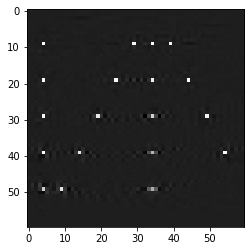

In [242]:
%run client.ipynb

In [243]:
def sending(sock):
        elapsed = time.perf_counter()
        send(sock, g.tobytes())
        elapsed = time.perf_counter() - elapsed
        print(f"Completed Execution in {elapsed} seconds")
        return elapsed

In [244]:
def multiconnect(g, num):
    #g = g.tobytes()
    elapsed = time.perf_counter()
    sockets = [socket.socket(socket.AF_INET, socket.SOCK_STREAM) for _ in range(num)]
    for sock in sockets:
        connect_host(sock)
    print(f"Connected in {time.perf_counter() - elapsed} seconds")
    pool = multiprocessing.Pool()
    return pool.map(sending, sockets)[0] #max()


In [245]:
def connect_thread(num):
    elapsed = time.perf_counter()
    connect(g)
    return time.perf_counter() - elapsed

In [246]:
def test_threads(num):
    threads = []
    pool = multiprocessing.Pool()
    elapsed = pool.map(connect_thread, range(num))[0]
    print(f"Max: {elapsed} seconds")
    return elapsed
    #ps = [];
    #for i in range(0, threads):
    #    p = Process(target=connect)
    #    p.start()
    #   ps.append(p)

    #for p in ps:
    #    p.join()

test_threads(3)

Completed Execution in 0.8877006230031839 secondsCompleted Execution in 0.8878068710037041 seconds

Completed Execution in 1.05470040300861 seconds
Max: 1.0580216679954901 seconds


1.0580216679954901

In [247]:
r = []

for i in range(12):
    r.append(test_threads(i+1)) #multiconnect(g, i+1)) #/(i+1)

Completed Execution in 0.6015553239994915 seconds
Max: 0.6047991720115533 seconds
Completed Execution in 0.831636791001074 seconds
Completed Execution in 0.9542802200012375 seconds
Max: 0.9572545780101791 seconds
Completed Execution in 0.7550718670099741 secondsCompleted Execution in 0.7552600039925892 seconds

Completed Execution in 1.030876007003826 seconds
Max: 1.033986490991083 seconds
Completed Execution in 1.2382657960115466 seconds
Completed Execution in 1.3251697100058664 seconds
Completed Execution in 1.369385965008405 seconds
Completed Execution in 1.6127234839950688 seconds
Max: 1.6158072230027756 seconds
Completed Execution in 1.579773567005759 seconds
Completed Execution in 1.626882436001324 secondsCompleted Execution in 1.6267818739870563 secondsCompleted Execution in 1.6265370899927802 seconds


Completed Execution in 1.7421005610085558 seconds
Max: 1.583570641989354 seconds
Completed Execution in 1.8837411040003644 seconds
Completed Execution in 1.9079228140035411 secon

In [278]:
seq = []
worth = []
rvalue = r[0]
for i in range(1, len(r) + 1):
    seq.append(rvalue*i)
    intercept = r[i-1]/rvalue
    worth.append((rvalue*i - r[i-1])*(i - intercept)/2 - (r[i-1])*(intercept-1)/2)
bestindex = max(range(len(worth)), key=worth.__getitem__)
best = r[bestindex]

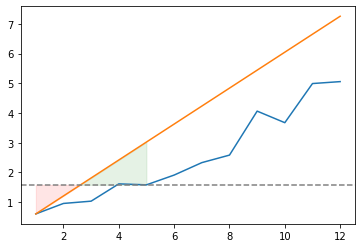

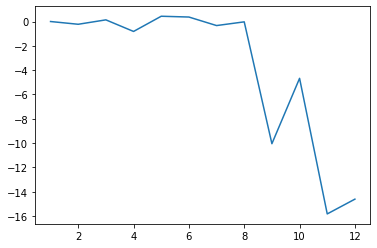

In [282]:
plt.plot(range(1, len(r)+1), r)
plt.plot(range(1, len(seq)+1), seq)
plt.axhline(best, color="gray", linestyle="--")
plt.fill_between(range(1, len(seq)+1), seq, best, where=[v < best for v in seq], alpha=0.1, color="red", interpolate=True)
plt.fill_between(range(1, len(seq)+1), seq, best, where=[seq[i] > best and i <= bestindex for i in range(len(seq))], alpha=0.1, color="green", interpolate=True)
plt.show()
plt.plot(range(1, len(worth)+1), worth)